<a href="https://colab.research.google.com/github/Karimby1/CMR_stage/blob/less_than_10/less_than_10_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Charger les données
df = pd.read_csv('/content/drive/MyDrive/cmrcleann.csv', delimiter=';')

# Ne garder que les produits à moins de 10 €
df_rf = df[df['UnitCostToEuro'] < 10].copy()


In [ ]:
df_rf['DatePhysical'] = pd.to_datetime(df_rf['DatePhysical'], dayfirst=True)
df_rf['Year'] = df_rf['DatePhysical'].dt.year
df_rf['Month'] = df_rf['DatePhysical'].dt.month
df_rf['Quarter'] = df_rf['DatePhysical'].dt.quarter
df_rf['IsEndOfYear'] = df_rf['Month'].isin([11, 12]).astype(int)


In [ ]:
# Encoder les colonnes object pour Random Forest
for col in ['Product', 'Company', 'RRS_Purchase', 'RRS_Sales']:
    le = LabelEncoder()
    df_rf[col] = le.fit_transform(df_rf[col])


In [ ]:
# Colonnes à utiliser
features = [
    'Product', 'Company', 'RRS_Purchase', 'RRS_Sales',
    'QTY', 'MoisAchat', 'Year', 'Month', 'Quarter', 'IsEndOfYear'
]

X = df_rf[features]
y = df_rf['UnitCostToEuro']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print(f"✅ MAE  : {mae:.4f} €")
print(f"✅ RMSE : {rmse:.4f} €")
print(f"✅ R²   : {r2:.4f}")



✅ MAE  : 0.8149 €
✅ RMSE : 1.4381 €
✅ R²   : 0.6962


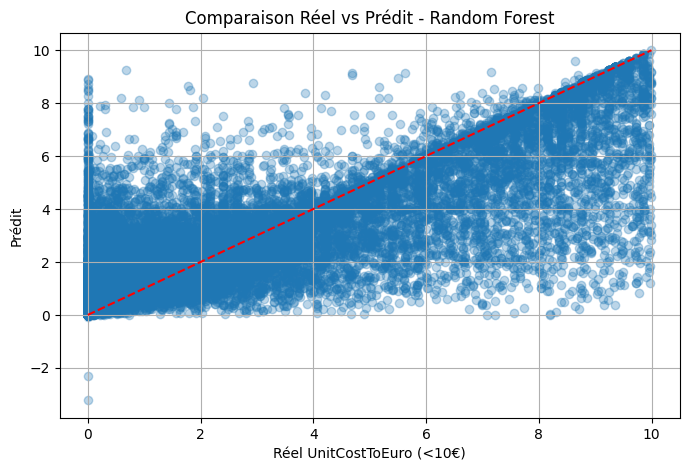

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Réel UnitCostToEuro (<10€)")
plt.ylabel("Prédit")
plt.title("Comparaison Réel vs Prédit - Random Forest")
plt.grid()
plt.show()
